# Machine Learning Results

## Section 1: Supervised Learning Using Only Embedding Information

### LogReg Embedding Only

In [1]:
import pandas as pd

#load results data
input_default =  'cv_results_top_3_logreg_default.pickle'
input_balanced = 'cv_results_top_3_logreg_cw_balanced.pickle'
input_hyper = 'cv_results_top_3_logreg_elasticnet_gridsearch.pickle'
input_net = 'cv_results_top_3_logreg_elasticnet.pickle'

r_def = pd.read_pickle(input_default)
r_bal = pd.read_pickle(input_balanced)
r_hyp = pd.read_pickle(input_hyper)
r_net = pd.read_pickle(input_net)




In [2]:
#wrap rouge score in dataframe
df_def = pd.DataFrame(r_def['Rouge']['rouge1'], index=['Default']).apply(lambda x: round(x,3))
df_bal = pd.DataFrame(r_bal['Rouge']['rouge1'], index=['Balanced']).apply(lambda x: round(x,3))
df_net = pd.DataFrame(r_net['Rouge']['rouge1'], index=['ElasticNet']).apply(lambda x: round(x,3))
#concatenate and display
df_logreg = pd.concat([df_def, df_bal, df_net]) 
df_logreg.columns.name = 'ROUGE-1'
df_logreg.index.name = 'LogReg'
df_logreg[['f1', 'recall', 'precision']]

ROUGE-1,f1,recall,precision
LogReg,,,
Default,0.411,0.396,0.561
Balanced,0.407,0.396,0.551
ElasticNet,0.415,0.401,0.566


In [3]:
#Gridsearch results for elastic net
import numpy as np

idx_max_score_hyp = np.argmax(np.array(r_hyp['scores']))
max_score_params = r_hyp['params'][idx_max_score_hyp]
max_score_hyp = r_hyp['scores'][idx_max_score_hyp]

print(max_score_params)
print(max_score_hyp)

(0.25, 0.5)
0.4149457245589446


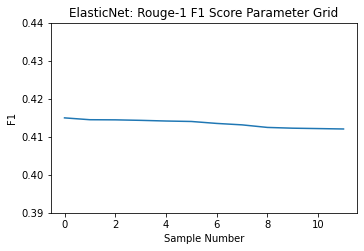

In [4]:
#plot gridsearch scores
import matplotlib.pyplot as plt

plt.figure(figsize=(5.5,3.5))
plt.plot(sorted(r_hyp['scores'], reverse=True));
plt.ylim(0.39, 0.44);
plt.title('ElasticNet: Rouge-1 F1 Score Parameter Grid');
plt.xlabel('Sample Number');
plt.ylabel('F1');

In [5]:
#wrap confusion matrix for defualt logreg in df for display
cm_def = pd.DataFrame(r_def['conf_matrix'], index= ['Out', 'In'], columns=['Out', 'In'])
cm_def.columns.name = 'Predicted'
cm_def.index.name = 'Actual'
cm_def

Predicted,Out,In
Actual,,
Out,29253,65
In,3032,75


In [6]:
#wrap confusion matrix for balanced logreg in df for display
cm_bal = pd.DataFrame(r_bal['conf_matrix'], index= ['Out', 'In'], columns=['Out', 'In'])
cm_bal.columns.name = 'Predicted'
cm_bal.index.name = 'Actual'
cm_bal

Predicted,Out,In
Actual,,
Out,19352,9966
In,1156,1951


In [7]:
#wrap confusion matrix for optimal elastic net in df for display
cm_net = pd.DataFrame(r_net['conf_matrix'], index= ['Out', 'In'], columns=['Out', 'In'])
cm_net.columns.name = 'Predicted'
cm_net.index.name = 'Actual'
cm_net

Predicted,Out,In
Actual,,
Out,29234,84
In,3013,94


### Neural Nets

In [8]:
#load results
input_25_no = 'cv_results_nn25_embeddings_only_no_cw_top3_epochs50.pickle'
input_25 = 'cv_results_nn25_embeddings_only_cw_top3_epochs50.pickle'
input_50 = 'cv_results_nn50_embeddings_only_cw_top3_epochs50.pickle'
input_75 = 'cv_results_nn75_embeddings_only_cw_top3_epochs50.pickle'
input_2525 = 'cv_results_nn2525_embeddings_only_cw_top3_epochs50.pickle'
input_2550 = 'cv_results_nn2550_embeddings_only_cw_top3_epochs50.pickle'
input_5050 = 'cv_results_nn5050_embeddings_only_cw_top3_epochs50.pickle'

r_nn25_no = pd.read_pickle(input_25_no)
r_nn25 = pd.read_pickle(input_25)
r_nn50 = pd.read_pickle(input_50)
r_nn75 = pd.read_pickle(input_75)
r_nn2525 = pd.read_pickle(input_2525)
r_nn2550 = pd.read_pickle(input_2550)
r_nn5050 = pd.read_pickle(input_5050)

In [9]:
#wrap rouge score in dataframe
df_nn25_no = pd.DataFrame(r_nn25_no['Rouge']['rouge1'], index=['NN 25 No Bal']).apply(lambda x: round(x,3))
df_nn25 = pd.DataFrame(r_nn25['Rouge']['rouge1'], index=['NN 25 Bal']).apply(lambda x: round(x,3))
df_nn50 = pd.DataFrame(r_nn50['Rouge']['rouge1'], index=['NN 50 Bal']).apply(lambda x: round(x,3))
df_nn75 = pd.DataFrame(r_nn75['Rouge']['rouge1'], index=['NN 75 Bal']).apply(lambda x: round(x,3))
df_nn2525 = pd.DataFrame(r_nn2525['Rouge']['rouge1'], index=['NN 25 25 Bal']).apply(lambda x: round(x,3))
df_nn2550 = pd.DataFrame(r_nn2550['Rouge']['rouge1'], index=['NN 25 50 Bal']).apply(lambda x: round(x,3))
df_nn5050 = pd.DataFrame(r_nn5050['Rouge']['rouge1'], index=['NN 50 50 Bal']).apply(lambda x: round(x,3))

In [10]:
#concatenate
df_nn = pd.concat([df_nn25_no, df_nn25, df_nn50, df_nn75, df_nn2525, df_nn2550, df_nn5050])

In [11]:
#display
df_nn.columns.name = 'ROUGE-1'
df_nn.index.name = 'Neural Network (Dense Dense)'
df_nn = df_nn[['f1', 'recall', 'precision']]

df_nn

ROUGE-1,f1,recall,precision
Neural Network (Dense Dense),,,
NN 25 No Bal,0.400,0.391,0.548
NN 25 Bal,0.405,0.397,0.547
NN 50 Bal,0.398,0.392,0.540
NN 75 Bal,0.403,0.393,0.549
NN 25 25 Bal,0.409,0.389,0.571
NN 25 50 Bal,0.402,0.405,0.538
NN 50 50 Bal,0.400,0.392,0.543


In [12]:
#wrap confusion matrix for optimal nn in df for display
cm_nn = pd.DataFrame(r_nn2525['conf_matrix'], index= ['Out', 'In'], columns=['Out', 'In'])
cm_nn.columns.name = 'Predicted'
cm_nn.index.name = 'Actual'
cm_nn

Predicted,Out,In
Actual,,
Out,23463,5855
In,1629,1478


In [13]:
#calculate macro cm scores for optimal nn
recall_nn = (cm_nn.iloc[1,1] / (cm_nn.iloc[1,0] + cm_nn.iloc[1,1]) + cm_nn.iloc[0,0] / 
             (cm_nn.iloc[0,0] + cm_nn.iloc[0,1]))/2
prec_nn = (cm_nn.iloc[1,1] / (cm_nn.iloc[0,1] + cm_nn.iloc[1,1]) + cm_nn.iloc[0,0] / 
           (cm_nn.iloc[0,0] + cm_nn.iloc[1,0]))/2
f1_nn = 2*recall_nn*prec_nn/ (recall_nn+prec_nn)
accuracy_nn = (cm_nn.iloc[0,0]+cm_nn.iloc[1,1])/cm_nn.sum().sum()

In [29]:
#calculate macro cm scores for best logreg
recall_lr = (cm_bal.iloc[1,1] / (cm_bal.iloc[1,0] + cm_bal.iloc[1,1]) + cm_bal.iloc[0,0] / 
             (cm_bal.iloc[0,0] + cm_bal.iloc[0,1]))/2
prec_lr = (cm_bal.iloc[1,1] / (cm_bal.iloc[0,1] + cm_bal.iloc[1,1]) + cm_bal.iloc[0,0] / 
           (cm_bal.iloc[0,0] + cm_bal.iloc[1,0]))/2
f1_lr = 2*recall_lr*prec_lr/ (recall_lr+prec_lr)
accuracy_lr = (cm_bal.iloc[0,0]+cm_bal.iloc[1,1])/cm_bal.sum().sum()

In [30]:
#concatenate and wrap in df for display
df_cm_scores_nn = pd.DataFrame(np.array([f1_nn, recall_nn, prec_nn, accuracy_nn]).reshape(1,4), 
                               index=['NN 25 25 Bal'], columns=['f1', 'recall', 'precision', 'accuracy'])
df_cm_scores_lr = pd.DataFrame(np.array([f1_lr, recall_lr, prec_lr, accuracy_lr]).reshape(1,4), 
                               index=['LogReg Bal'], columns=['f1', 'recall', 'precision','accuracy'])
df_cm_scores = pd.concat([df_cm_scores_nn, df_cm_scores_lr])
df_cm_scores.index.name = 'Standard Confusion Matrix Scores (Macro)'
df_cm_scores = df_cm_scores.apply(lambda x: round(x,3))
df_cm_scores

,f1,recall,precision,accuracy
Standard Confusion Matrix Scores (Macro),,,,
NN 25 25 Bal,0.601,0.638,0.568,0.769
LogReg Bal,0.595,0.644,0.554,0.657


### TextRank Baseline

In [31]:
#load results
input_textrank = 'cv_results_textrank.pickle'

r_textrank = pd.read_pickle(input_textrank)

scores_textrank = r_textrank['Rouge']

In [32]:
#concatenate optimal models for baseline comparison and display Rouge1
df_rouge1_textrank = pd.DataFrame(scores_textrank['rouge1'], index=['TextRank']).apply(lambda x: round(x,3))
df_rouge1_nn2525 = df_nn2525
df_rouge1_lr = df_net

df_rouge1_baseline = pd.concat([df_rouge1_textrank, df_rouge1_lr, df_rouge1_nn2525 ])
df_rouge1_baseline=df_rouge1_baseline[['f1', 'recall', 'precision']]
df_rouge1_baseline.columns.name = 'ROUGE-1'
df_rouge1_baseline

ROUGE-1,f1,recall,precision
TextRank,0.340,0.326,0.469
ElasticNet,0.415,0.401,0.566
NN 25 25 Bal,0.409,0.389,0.571


In [33]:
#concatenate optimal models for baseline comparison and display RougeL
df_rougeL_textrank = pd.DataFrame(scores_textrank['rougeL'], index=['TextRank']).apply(lambda x: round(x,3))
df_rougeL_lr = pd.DataFrame(r_net['Rouge']['rougeL'], index=['ElasticNet']).apply(lambda x: round(x,3))
df_rougeL_nn2525 = pd.DataFrame(r_nn2525['Rouge']['rougeL'], index=['NN 25 25 Bal']).apply(lambda x: round(x,3))

df_rougeL_baseline = pd.concat([df_rougeL_textrank, df_rougeL_lr, df_rougeL_nn2525 ])
df_rougeL_baseline=df_rougeL_baseline[['f1', 'recall', 'precision']]
df_rougeL_baseline.columns.name = 'ROUGE-L'
df_rougeL_baseline

ROUGE-L,f1,recall,precision
TextRank,0.271,0.255,0.384
ElasticNet,0.371,0.356,0.510
NN 25 25 Bal,0.360,0.341,0.506


In [34]:
#Pull article and display summaries across models + gold summary
article_label = 1

print('\033[1m{:10s}\033[0m'.format('Original')) 
print(r_textrank['summaries_comp'][article_label][1].replace('\n\n', ''))
print('')

print('\033[1m{:10s}\033[0m'.format('Elastic Net')) 
print(r_net['summaries_comp'][article_label][0].replace('\n\n', ''))
print('')

print('\033[1m{:10s}\033[0m'.format('Neural Net')) 
print(r_nn2525['summaries_comp'][article_label][0].replace('\n\n', ''))
print('')

print('\033[1m{:10s}\033[0m'.format('TextRank')) 
print(r_textrank['summaries_comp'][article_label][0].replace('\n\n', ''))

Original  
By CORKY SIEMASZKO DAILY NEWS STAFF WRITER Mother Teresa believed she was possessed by the Devil, the archbishop of Calcutta said yesterday. So the revered nun, whom the Vatican hopes to make a saint, underwent an exorcism and afterward "slept like a baby,"he said. Archbishop Henry D'Souza's bizarre revelation came as millions yesterday marked the fourth anniversary of Mother Teresa's death. But D'Souza told CNN and The Associated Press in India he truly believed

Elastic Net
Archbishop Henry D'Souza's bizarre revelation came as millions yesterday marked the fourth anniversary of Mother Teresa's death. The Catholic cleric said he diagnosed the demon in Mother Teresa shortly before she had a fatal heart attack Sept. 5, 1997, and died at age 87. Mother Teresa won a Nobel Prize for her life's work, and Pope John Paul has begun the process of declaring her a saint.

Neural Net
Mother Teresa believed she was possessed by the Devil, the archbishop of Calcutta said yesterday. So th

## Section 2: Supervised Learning Including Sequential Information

### LogReg with Sentence Number

In [35]:
#load data
import pandas as pd

input_sent_num_def =  'cv_results_top_3_logreg_sent_num_no_bal.pickle'
input_sent_num_bal = 'cv_results_top_3_logreg_sent_num_bal.pickle'

r_sent_num_def = pd.read_pickle(input_sent_num_def)
r_sent_num_bal = pd.read_pickle(input_sent_num_bal)

In [36]:
#wrap rouge score in dataframe, concatenate and display
df_sent_num_def= pd.DataFrame(r_sent_num_def['Rouge']['rouge1'], index=['Default']).apply(lambda x: round(x,3))
df_sent_num_bal = pd.DataFrame(r_sent_num_bal['Rouge']['rouge1'], index=['Balanced']).apply(lambda x: round(x,3))

df_lr_sent_num = pd.concat([df_sent_num_def, df_sent_num_bal]) 
df_lr_sent_num.columns.name = 'ROUGE-1'
df_lr_sent_num.index.name = 'LogReg'
df_lr_sent_num[['f1', 'recall', 'precision']]

ROUGE-1,f1,recall,precision
LogReg,,,
Default,0.525,0.527,0.684
Balanced,0.499,0.505,0.647


### Long Short Term Memory (LSTM)

In [37]:
#load data
input_lstm_un25 = 'cv_results_lstm_uni25_embeddings_only_epochs1_top3.pickle'
input_lstm_un50 = 'cv_results_lstm_uni50_embeddings_only_epochs1_top3.pickle'
input_lstm_bi25 = 'cv_results_lstm_bi25_embeddings_only_epochs1_top3.pickle'
input_lstm_bi50 = 'cv_results_lstm_bi50_embeddings_only_epochs1_top3.pickle'

r_lstm_un25 = pd.read_pickle(input_lstm_un25)
r_lstm_un50 = pd.read_pickle(input_lstm_un50)
r_lstm_bi25 = pd.read_pickle(input_lstm_bi25)
r_lstm_bi50 = pd.read_pickle(input_lstm_bi50)

In [38]:
#wrap rouge score in dataframe

df_lstm_un25 = pd.DataFrame(r_lstm_un25['Rouge']['rouge1'], index=['LSTM Uni 25']).apply(lambda x: round(x,3))
df_lstm_un50 = pd.DataFrame(r_lstm_un50['Rouge']['rouge1'], index=['LSTM Uni 50']).apply(lambda x: round(x,3))
df_lstm_bi25 = pd.DataFrame(r_lstm_bi25['Rouge']['rouge1'], index=['LSTM Bi 25']).apply(lambda x: round(x,3))
df_lstm_bi50 = pd.DataFrame(r_lstm_bi50['Rouge']['rouge1'], index=['LSTM Bi 50']).apply(lambda x: round(x,3))

In [39]:
#concatenate
df_lstm = pd.concat([df_lstm_un25, df_lstm_un50, df_lstm_bi25, df_lstm_bi50])

In [40]:
#display Rouge1
df_lstm.columns.name = 'ROUGE-1'
df_lstm.index.name = 'LSTM'
df_lstm = df_lstm[['f1', 'recall', 'precision']]

df_lstm

ROUGE-1,f1,recall,precision
LSTM,,,
LSTM Uni 25,0.599,0.593,0.760
LSTM Uni 50,0.597,0.586,0.767
LSTM Bi 25,0.595,0.583,0.767
LSTM Bi 50,0.603,0.594,0.769


### LEDE3

### Rouge1

In [41]:
#load data
input_lede3 = 'cv_results_LEDE3.pickle'
r_lede3 = pd.read_pickle(input_lede3)
df_lede3 = pd.DataFrame(r_lede3['Rouge']['rouge1'], index=['LEDE3']).apply(lambda x: round(x,3))

In [42]:
#concatenate optimal models for baseline comparison and display Rouge1
df_lede3_comp = pd.concat([df_lede3, df_sent_num_def, df_lstm_bi50])
df_lede3_comp=df_lede3_comp[['f1', 'recall', 'precision']]
df_lede3_comp.index = ['LEDE3', 'LogReg Def', 'LSTM Bi 50']
df_lede3_comp.columns.name = 'ROUGE-1'
df_lede3_comp

ROUGE-1,f1,recall,precision
LEDE3,0.567,0.599,0.698
LogReg Def,0.525,0.527,0.684
LSTM Bi 50,0.603,0.594,0.769


### Rouge L

In [43]:
#wrap optimal models in df
df_lede3_rougeL = pd.DataFrame(r_lede3['Rouge']['rougeL'], index=['LEDE3']).apply(lambda x: round(x,3))
df_sent_num_def_rougeL= pd.DataFrame(r_sent_num_def['Rouge']['rougeL'], index=['Default']).apply(lambda x: round(x,3))
df_lstm_bi50_rougeL = pd.DataFrame(r_lstm_bi50['Rouge']['rougeL'], index=['LSTM Bi 50']).apply(lambda x: round(x,3))

In [44]:
#concatenate optimal models for baseline comparison and display RougeL
df_lede3_comp_rougeL = pd.concat([df_lede3_rougeL, df_sent_num_def_rougeL, df_lstm_bi50_rougeL])
df_lede3_comp_rougeL =df_lede3_comp_rougeL [['f1', 'recall', 'precision']]
df_lede3_comp_rougeL .index = ['LEDE3', 'LogReg Def', 'LSTM Bi 50']
df_lede3_comp_rougeL .columns.name = 'ROUGE-L'
df_lede3_comp_rougeL 

ROUGE-L,f1,recall,precision
LEDE3,0.552,0.582,0.678
LogReg Def,0.498,0.500,0.648
LSTM Bi 50,0.587,0.577,0.746
